In [1]:
import pandas as pd

# Load the Excel file
file_path = r"D:\Excelr\Data Science\Data Science Assignment\Decision Tree\Decision Tree\heart_disease.xlsx"
# Check the sheet names
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

sheet_names

['Description', 'Heart_disease']

In [2]:
# Load both sheets
description_df = pd.read_excel(file_path, sheet_name='Description')
heart_disease_df = pd.read_excel(file_path, sheet_name='Heart_disease')

# structure of both sheets
description_df_info = description_df.info()
heart_disease_df_info = heart_disease_df.info()

(description_df.head(), description_df_info, heart_disease_df.head(), heart_disease_df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int

(        age                                       Age in years
 0    Gender                       Gender ; Male - 1, Female -0
 1        cp                                    Chest pain type
 2  trestbps                             Resting blood pressure
 3      chol                                cholesterol measure
 4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...,
 None,
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
 0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
 1   41  Male  atypical angina       135   203  False          normal     132   
 2   57  Male     asymptomatic       140   192  False          normal     148   
 3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
 4   57  Male     asymptomatic       110   201  False          normal     126   
 
    exang  oldpeak        slope          thal  num  
 0  False      2.3  downsloping  fixed defect    0  
 1  False     

In [12]:
# EDA

<Figure size 1400x800 with 0 Axes>

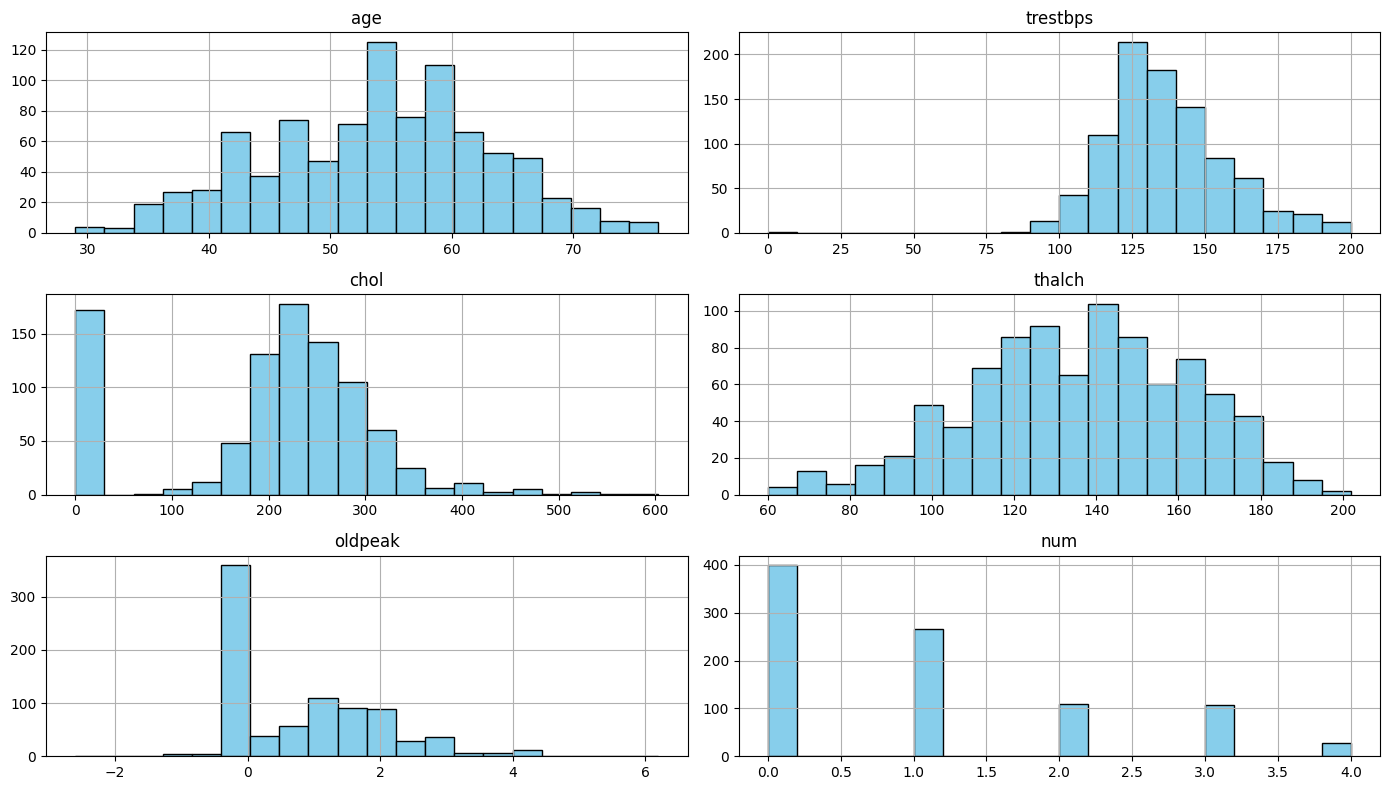

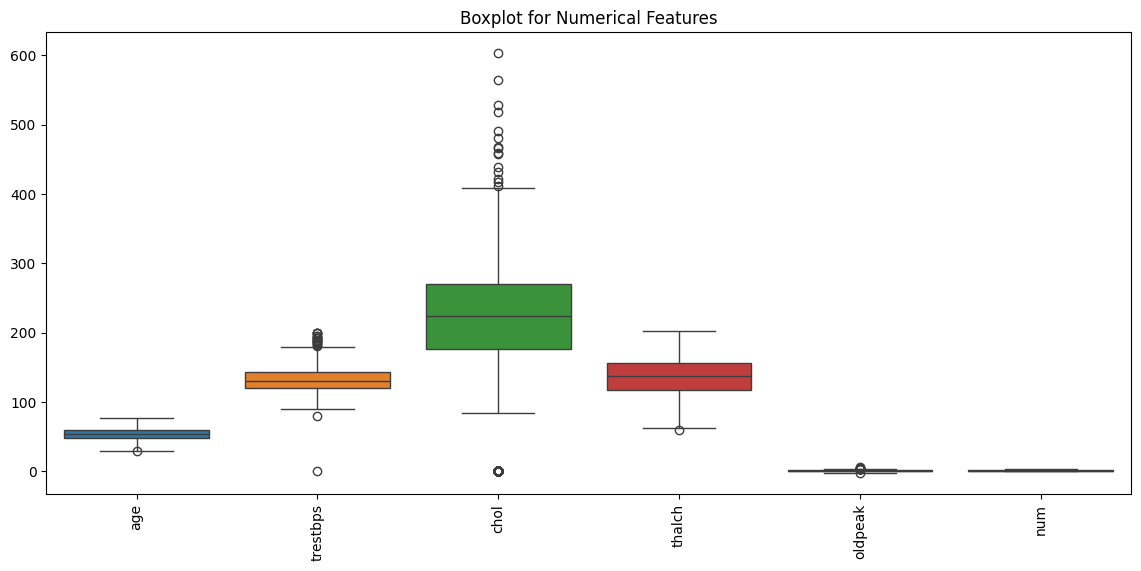

C:\Users\Admin\AppData\Local\Temp\ipykernel_6752\1192725310.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heart_disease_df.corr()


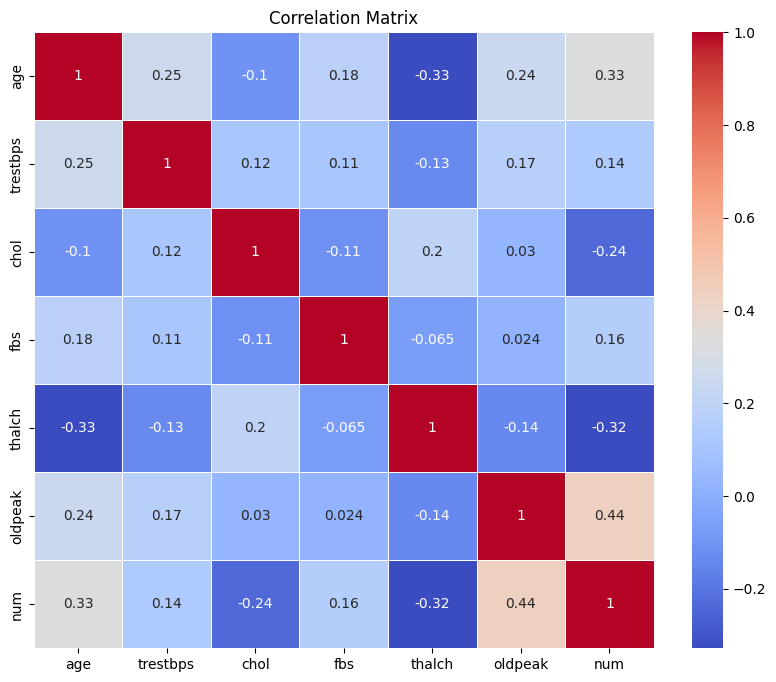

(age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalch       0
 exang        0
 oldpeak     62
 slope        0
 thal         0
 num          0
 dtype: int64,
               age    trestbps        chol      thalch     oldpeak         num
 count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
 mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
 std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
 min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
 25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
 50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
 75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
 max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# missing values
missing_values = heart_disease_df.isnull().sum()
# basic statistics and summary
summary_statistics = heart_disease_df.describe()
# Visualize
plt.figure(figsize=(14, 8))
heart_disease_df.hist(bins=20, figsize=(14, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()
# Boxplot to detect outliers for numerical features
plt.figure(figsize=(14, 6))
sns.boxplot(data=heart_disease_df.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=90)
plt.show()
# Correlation matrix visualization
plt.figure(figsize=(10, 8))
correlation_matrix = heart_disease_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# missing values and summary statistics
missing_values, summary_statistics

In [14]:
# Feature eng

In [4]:
# unique values in 'exang' and 'fbs' columns
exang_unique_values = heart_disease_df['exang'].unique()
fbs_unique_values = heart_disease_df['fbs'].unique()

exang_unique_values, fbs_unique_values

(array([False, True, 'FALSE', 'TURE'], dtype=object), array([ True, False]))

In [5]:
from sklearn.preprocessing import StandardScaler

# 1. Correcting inconsistencies in 'exang' column
heart_disease_df['exang'] = heart_disease_df['exang'].replace({'FALSE': False, 'TURE': True, 'TRUE': True})
# 2. Handling missing values (fill missing values in 'oldpeak' with the median)
heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median(), inplace=True)
# 3. Encoding categorical variables: 'sex', 'cp', 'restecg', 'slope', 'thal', 'exang'
heart_disease_encoded = pd.get_dummies(heart_disease_df, columns=['sex', 'cp', 'restecg', 'slope', 'thal', 'exang'], drop_first=True)
# 4. Scaling numerical features: age, trestbps, chol, thalch, oldpeak
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_disease_encoded[numerical_features] = scaler.fit_transform(heart_disease_encoded[numerical_features])

# transformed dataset
heart_disease_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,exang_True
0,1.006027,0.567394,0.281297,True,0.524183,1.354403,0,1,0,0,1,0,0,0,0,0,0,0
1,-1.397560,0.076967,0.013526,False,-0.147705,-0.815718,0,1,1,0,0,1,0,1,0,0,0,0
2,0.350503,0.322181,-0.084656,False,0.449529,-0.438305,0,1,0,0,0,1,0,1,0,0,0,0
3,-0.195767,-0.756760,-0.138211,False,2.017268,-0.815718,0,1,0,0,1,0,0,1,0,0,0,0
4,0.350503,-1.149102,-0.004325,False,-0.371668,0.599578,0,1,0,0,0,1,0,1,0,0,0,1


In [19]:
# Decision tree

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Splitting the dataset into features and target variable
X = heart_disease_encoded.drop('num', axis=1)
y = heart_disease_encoded['num']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)
# Predict on the testing set
y_pred = dt_classifier.predict(X_test)
# model performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')
# classification report
classification_rep = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc, classification_rep

(0.489010989010989,
 0.48023039762170194,
 0.489010989010989,
 0.4844384502632332,
 0.5724026599716712,
 '              precision    recall  f1-score   support\n\n           0       0.70      0.72      0.71        89\n           1       0.35      0.35      0.35        48\n           2       0.30      0.27      0.29        22\n           3       0.11      0.12      0.11        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.49       182\n   macro avg       0.29      0.29      0.29       182\nweighted avg       0.48      0.49      0.48       182\n')

In [7]:
from sklearn.model_selection import GridSearchCV

# parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10, None],'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']}
# GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
# grid search on the training data
grid_search.fit(X_train, y_train)
# Best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# Train the best model on the training set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
# performance of the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

best_params, best_score, accuracy_best, precision_best, recall_best, f1_best

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2},
 0.5509683514407181,
 0.5439560439560439,
 0.4635758132814418,
 0.5439560439560439,
 0.5003182262656781)

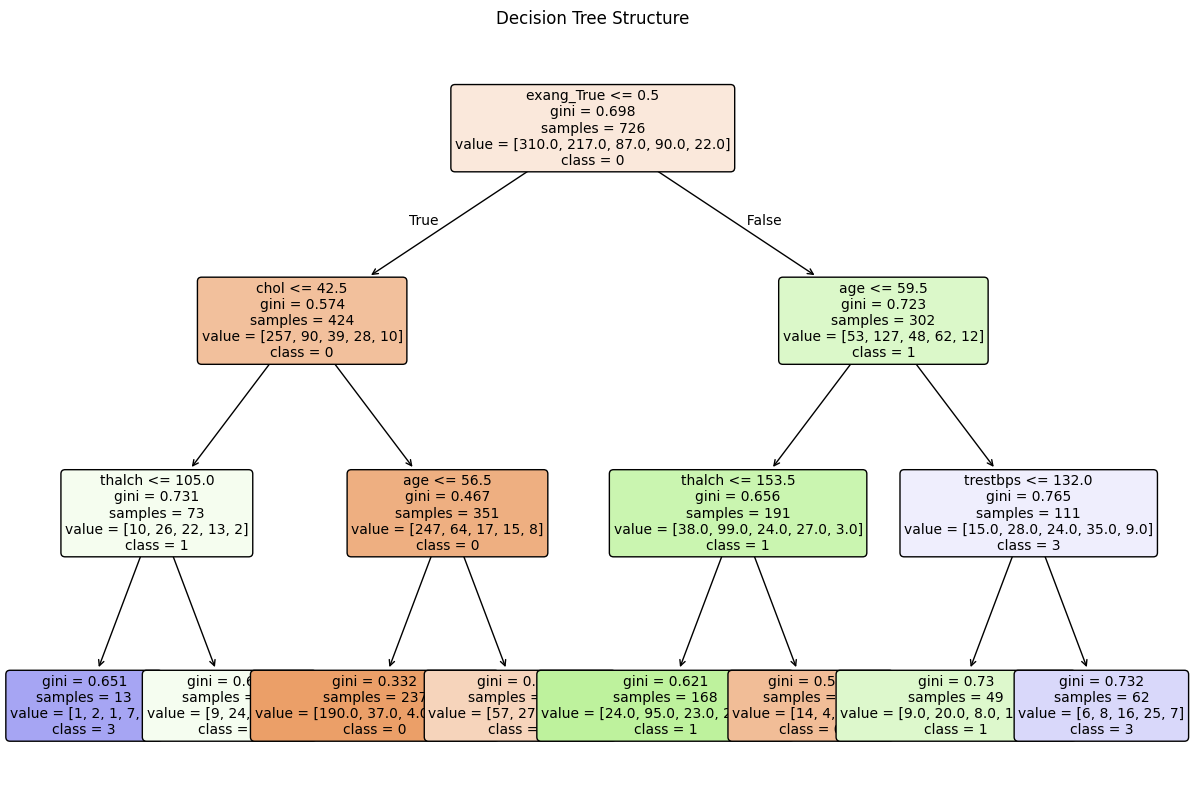

,Importance
exang_True,0.432233
chol,0.253914
age,0.165503
thalch,0.111412
trestbps,0.036938
fbs,0.000000
oldpeak,0.000000
sex_Male,0.000000
cp_atypical angina,0.000000
cp_typical angina,0.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"D:\Excelr\Data Science\Data Science Assignment\Decision Tree\Decision Tree\heart_disease.xlsx"
heart_disease_df = pd.read_excel(file_path, sheet_name='Heart_disease')
heart_disease_df['exang'] = heart_disease_df['exang'].replace({'FALSE': False, 'TURE': True, 'TRUE': True})
heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median(), inplace=True)
# One-hot encoding
heart_disease_encoded = pd.get_dummies(heart_disease_df, columns=['sex', 'cp', 'restecg', 'slope', 'thal', 'exang'], drop_first=True)
# Splitting data into X and y
X = heart_disease_encoded.drop('num', axis=1)
y = heart_disease_encoded['num']
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
best_model.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=[str(i) for i in range(5)], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()
# feature importance
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
# feature importances
feature_importances